In [1]:
import pandas as pd
import numpy
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#features are for 
features = pd.read_csv('frame.gzip',compression='gzip')
cordf = pd.read_csv('cordf.gzip',compression='gzip')

In [3]:

ufeatures = features.drop(columns=['Unnamed: 0','year_of_death','place_of_death'])
x = ufeatures.drop(columns=['life-span','treatment_source'])
y =ufeatures['life-span']

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


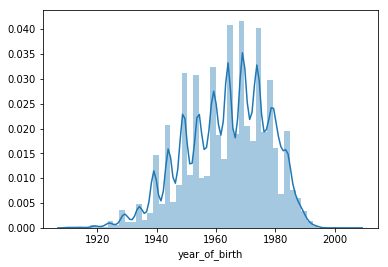

In [4]:
%matplotlib inline
import seaborn as sns
sns.distplot(features['year_of_birth'])

In [5]:
# ufeatures.head(15)

In [6]:
# cordf

In [7]:
x.head(30)

,state,rural,diagnosed_for,is_car,year_of_birth,highest_qualification,occupation_status,disability_status,diagnosed_for.1,chew,smoke,alcohol,wt,sex
0,18,1.0,0.0,2.0,1979.0,0.0,1.0,0.0,0.0,1.0,3.0,2.0,27.00,1.0
1,18,1.0,0.0,2.0,1986.0,4.0,1.0,0.0,0.0,1.0,4.0,2.0,27.00,1.0
2,18,1.0,0.0,2.0,1969.0,6.0,1.0,0.0,0.0,1.0,4.0,2.0,54.07,1.0
3,18,1.0,0.0,2.0,1949.0,1.0,10.0,0.0,0.0,2.0,4.0,4.0,27.00,1.0
4,18,1.0,0.0,2.0,1961.0,0.0,10.0,4.0,0.0,2.0,4.0,4.0,27.00,2.0
5,18,1.0,0.0,2.0,1964.0,0.0,10.0,0.0,0.0,2.0,4.0,4.0,27.00,2.0
6,18,1.0,0.0,2.0,1984.0,3.0,3.0,0.0,0.0,2.0,2.0,4.0,27.00,1.0
7,18,1.0,0.0,2.0,1964.0,2.0,10.0,0.0,0.0,2.0,4.0,4.0,27.00,2.0
8,18,1.0,0.0,2.0,1979.0,4.0,4.0,0.0,0.0,1.0,4.0,4.0,54.07,1.0
9,18,1.0,0.0,2.0,1957.0,0.0,3.0,0.0,0.0,2.0,4.0,4.0,54.07,1.0


In [8]:
#pd.get_dummies()

# Feature Engineering

In [9]:
#chaging highest qualification 

x.highest_qualification.replace(9,6,inplace=True)

In [10]:
#changing the states 
from sklearn import preprocessing
lencoder = preprocessing.LabelEncoder()
x.state = lencoder.fit_transform(x.state)
stateli = [0,1, 2, 3,4,5,6]
encodelab = lencoder.inverse_transform(stateli)
sedict = {}
for i in stateli:
    sedict[encodelab[i]] = i
sedict

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


{5: 0, 8: 1, 10: 2, 18: 3, 20: 4, 21: 5, 22: 6}

In [11]:
#changing year of birth
x.year_of_birth = x.year_of_birth - 1900

In [12]:
#change chew codes
chewcd = {
    0:0,
    1:6,
    2:3,
    3:7,
    4:4,
    5:5,
    6:2,
    7:1,
}
x.chew = x.chew.apply(lambda x:chewcd[x])

In [13]:
#change smoke
x.smoke.replace(0,2,inplace=True)

In [14]:
#change alcohol
x.alcohol.replace(0,2,inplace=True)

In [15]:
x.head(3)

,state,rural,diagnosed_for,is_car,year_of_birth,highest_qualification,occupation_status,disability_status,diagnosed_for.1,chew,smoke,alcohol,wt,sex
0,3,1.0,0.0,2.0,79.0,0.0,1.0,0.0,0.0,6,3.0,2.0,27.00,1.0
1,3,1.0,0.0,2.0,86.0,4.0,1.0,0.0,0.0,6,4.0,2.0,27.00,1.0
2,3,1.0,0.0,2.0,69.0,6.0,1.0,0.0,0.0,6,4.0,2.0,54.07,1.0


In [16]:
from sklearn import preprocessing
import numpy as np

In [17]:
# scalarx = preprocessing.StandardScaler()
# scalary = preprocessing.StandardScaler()
# sx = scalarx.fit_transform(x)
# sy = scalary.fit_transform(np.array(y).reshape(-1, 1))

In [18]:
np.array(y).T

array([30., 23., 40., ..., 35., 56., 26.])

In [19]:
from sklearn import preprocessing
fvals = x.values #returns a numpy array
scalerx = preprocessing.StandardScaler()
scalery = preprocessing.StandardScaler()
sx = scalerx.fit_transform(fvals)
sy = scalery.fit_transform(np.array(y).reshape(-1, 1))


In [21]:
from sklearn.model_selection import train_test_split
sxtr,sxte,sytr,syte = train_test_split(sx,sy,test_size=0.20, random_state=20)

In [22]:
#trails for column or not
# t = np.array([[2,0,1500],[3,-5,8000],[6,0.21,2000]])
# sca = preprocessing.StandardScaler()
# sca.fit_transform(t)
# len(sx)
# sxtr = sx[:380000]
# sxte = sx[380000:]
# sytr = sy[:380000]
# syte = sy[380000:]
# model = Sequential()
# model.add(Dense(12, input_dim=8, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [23]:
sxtr.shape

(344820, 14)

In [24]:

def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_dim=14),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.GradientDescentOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                960       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [25]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 10 == 0: print('')
    print(epoch, end=' ')

EPOCHS = 500
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# Store training stats
history = model.fit(sxtr, sytr, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop,PrintDot()])


0 1 2 3 4 5 6 7 8 9 
10 11 12 13 14 15 16 17 18 19 
20 21 22 23 24 25 26 27 28 29 
30 31 32 33 34 35 36 37 38 39 
40 41 42 43 44 45 46 47 48 49 
50 51 52 53 54 55 56 57 58 59 
60 61 62 63 64 65 66 67 68 69 
70 71 72 73 74 75 76 77 78 79 
80 81 82 83 84 85 86 87 88 89 
90 91 92 93 94 95 96 97 98 99 
100 101 102 103 104 105 106 107 108 109 
110 111 112 113 114 115 116 117 118 119 
120 121 122 123 124 125 126 127 128 129 
130 131 132 133 134 135 136 137 138 139 
140 141 142 143 144 145 146 147 148 149 
150 151 152 153 154 155 156 157 158 159 
160 161 162 163 164 165 166 167 168 169 
170 171 172 173 174 175 176 177 178 179 
180 181 182 183 184 185 186 187 188 189 
190 191 192 193 194 195 196 197 198 199 
200 201 202 203 204 205 206 207 208 209 
210 211 212 213 214 215 216 217 218 219 
220 221 

In [34]:
model.save('final/model.h5')

C:\ProgramData\Anaconda3\lib\site-packages\keras\models.py:139: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [36]:
from sklearn.externals import joblib 

joblib.dump(lencoder, 'final/lableenc.pkl') 

['final/lableenc.pkl']

In [ ]:
joblib.dump(lencoder, 'final/lableenc.pkl') 
joblib.dump(lencoder, 'final/lableenc.pkl') 

In [26]:
# model.evaluate(x=sxte, y=syte)

In [27]:
# scalery.inverse_transform([[0.012])

In [28]:
predicted = scalery.inverse_transform(model.predict(sxte))
ytrue = scalery.inverse_transform(syte)

In [29]:
predicted

array([[38.016277],
       [39.6522  ],
       [47.65102 ],
       ...,
       [30.481375],
       [46.280582],
       [34.583595]], dtype=float32)

In [31]:
ytrue

array([[36.],
       [39.],
       [46.],
       ...,
       [29.],
       [45.],
       [34.]])

In [31]:
ytrue

NameError: name 'ytrue' is not defined

In [32]:
error = 0
for i in range(51026):
    error = error + abs(predicted[i] - ytrue[i])
error/51026 

array([1.14323761])

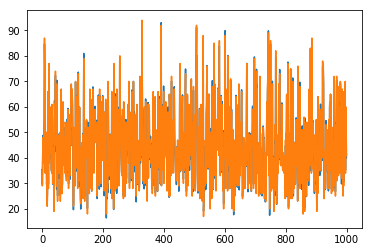

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(predicted[6000:7000])
plt.plot(ytrue[6000:7000])
plt.show()

In [87]:
pre = model.predict(xte)

In [88]:
pred =[]
for i in pre:
    pred.append(i[0])

In [89]:
pli = [5,1,]

In [93]:
error = 0
for i in range(86206):
    error = error + abs(npred[i] - nyte[i])
error/86206    
# np.mean(npred == nyte)

7.516227191665473

In [92]:
npred = np.array(pred)
nyte = np.array(yte)


In [57]:
keras.metrics.categorical_accuracy(nyte, npred)

<tf.Tensor 'Cast_1:0' shape=() dtype=float32>

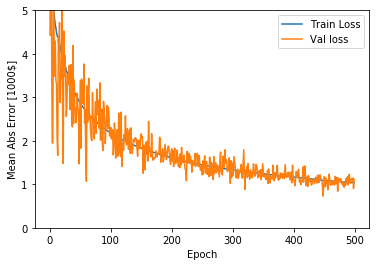

In [17]:
import numpy as np
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history)

In [11]:
from tkinter import *

def process_command(text):
    ''' Given a string, returns a string in response. '''
    text = text.strip().lower()
    if text == 'window':
        return 'The window is broken.'
    # elif ...:
    # elif ...:
    elif text in {'quit', 'exit'}:
        return
    else:
        return 'Unknown command.'

def main():
    ''' Main entry point of the program: create the windows and
        kick off the event loop '''
    tk = Tk()
    canvas = Canvas(tk, width=400, height=200, bg='white')
    canvas.pack()

    text = Text(tk, height=10, width=50, bg='light gray')
    text.pack()

    def process_callback(*args):
        ''' Callback that's called when the user presses enter or
            clicks the button. '''
        
        # figure out what the response to the input should be
        response = process_command(entry.get())
        
        if response is None:
            tk.quit()
            tk.destroy()
            return
        
        # write the response
        text.insert(END, '\n{}\n'.format(response))
        
        # clear the input field
        entry.delete(0, END)

    entry = Entry(tk, width=65, bd=5)
    entry.pack()
    entry.focus()
    entry.bind('<Return>', process_callback)

    btn = Button(tk, width=50, bd=3, bg='dark gray', text='Submit',
                    command=process_callback)
    btn.pack()

    text.insert(END, "You are in a room. There's a window on the wall.\n")

    tk.mainloop()

if __name__ == '__main__':
    main()